In [1]:

from utils.load import load_data, load_submission
from utils.feature import (
    add_hours,
    add_hours_trig_cyclic,
    apply_feature_engineering,
    get_dummies,
    fill_na_zero,
    drop_non_input_cols,
    normalize,
    standardize
)
from utils.model import ModelEvalWrapper

In [7]:
train_df, predict_df = load_data('../data')

In [8]:
_train_df, _predict_df = apply_feature_engineering(
    train_df,
    predict_df,
    funcs=[
        add_hours,
        fill_na_zero("all"),
        normalize(["txpower_cell0", "txpower_cell1", "txpower_cell2", "txpower_cell3"]),
        standardize(
            [
                "bandwidth_cell0",
                "antennas_cell0",
                "bandwidth_cell1",
                "antennas_cell1",
                "bandwidth_cell2",
                "antennas_cell2",
                "bandwidth_cell3",
                "antennas_cell3",
            ]
        ),
        get_dummies(
            [
                "hour",
                "rutype",
                "mode",
                "frequency_cell0",
                "frequency_cell1",
                "frequency_cell2",
                "frequency_cell3",
            ]
        ),
        drop_non_input_cols,
    ],
)


In [4]:
from sklearn.svm import LinearSVR

model_getter = lambda: LinearSVR(max_iter=10000)
model_trainer = lambda model, X, y, *args, **kwargs: model.fit(X, y)
model_predictor = lambda model, X: model.predict(X)
model_eval = ModelEvalWrapper(
    model_getter,
    name="SVM",
    model_trainer=model_trainer,
    model_predictor=model_predictor,
)

model_eval.train_and_eval(_train_df)

INFO:root:Fold 1/5
INFO:root:Train MAE: 3.2463, MAPE: 0.1291, MSE: 21.5645
INFO:root:Test MAE: 3.2531, MAPE: 0.1303, MSE: 20.8235
INFO:root:Fold 2/5
INFO:root:Train MAE: 3.2512, MAPE: 0.1296, MSE: 21.5440
INFO:root:Test MAE: 3.2334, MAPE: 0.1278, MSE: 20.9256
INFO:root:Fold 3/5
INFO:root:Train MAE: 3.2423, MAPE: 0.1290, MSE: 20.8596
INFO:root:Test MAE: 3.2713, MAPE: 0.1303, MSE: 23.6616
INFO:root:Fold 4/5
INFO:root:Train MAE: 3.2568, MAPE: 0.1295, MSE: 21.6522
INFO:root:Test MAE: 3.2126, MAPE: 0.1278, MSE: 20.5910
INFO:root:Fold 5/5
INFO:root:Train MAE: 3.2404, MAPE: 0.1289, MSE: 21.4688
INFO:root:Test MAE: 3.2798, MAPE: 0.1306, MSE: 21.2623
INFO:root:
Best model from fold 4
INFO:root:Best model mae: 3.2126, mape: 0.1278 mse: 20.5910

INFO:root:Average mae: 3.2500, mape: 0.1293, mse: 21.4528
INFO:root:Std mae: 0.0246, mape: 0.0013, mse: 1.1253

INFO:root:Analytic evaluations for best model
INFO:root:Error metrics by number of cells in usage
INFO:root:Metrics for 0 cells in usage (87225

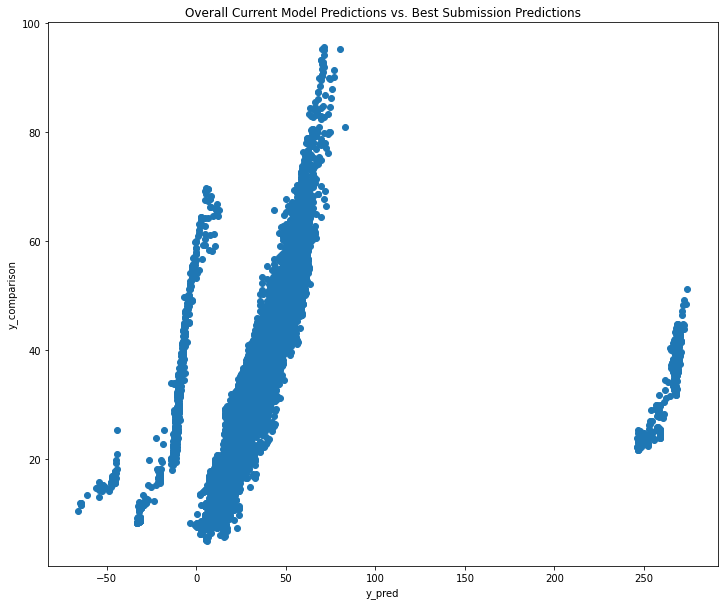

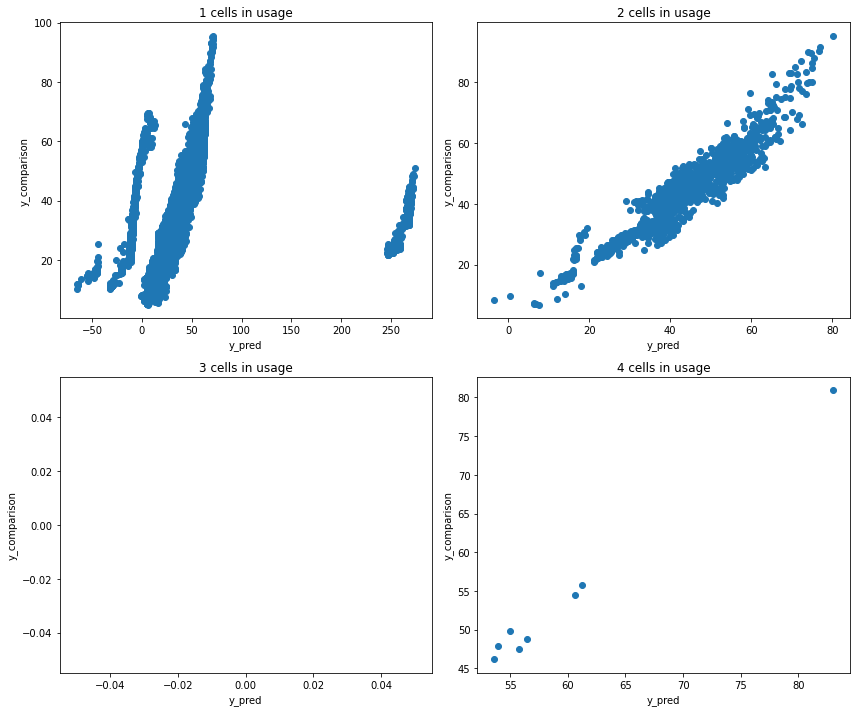

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
best_submission = load_submission("bestsubmission.csv")
model_eval.compare_predictions_with(_predict_df, best_submission['Energy'])